In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io


In [2]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 88.2MB/s]


In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#EDA

In [5]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [6]:
def unique_vals(col):

  if col.dtype == "object":

    print(f'{col.name}: {col.nunique()}')

df.apply(lambda col: unique_vals(col))

Attrition: 2
BusinessTravel: 3
Department: 3
EducationField: 6
Gender: 2
JobRole: 9
MaritalStatus: 3
OverTime: 2


,0
Age,None
Attrition,None
BusinessTravel,None
DailyRate,None
Department,None
DistanceFromHome,None
Education,None
EducationField,None
EnvironmentSatisfaction,None
Gender,None


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

def label_encode(ser):

    if ser.dtype=="object" and ser.nunique() <= 2:
      print(ser.name)

      le.fit(ser)
      ser = le.transform(ser)

    return ser

df = df.apply(lambda col: label_encode(col))

Attrition
Gender
OverTime


In [8]:
df = pd.get_dummies(df, columns = ["BusinessTravel", "Department", "MaritalStatus"], drop_first = True)

In [9]:
target = df['Attrition'].copy()
df = df.drop(["Attrition"], axis = 1)
type(target)

pandas.core.series.Series

In [10]:
target.value_counts()

,count
Attrition,
0,1233
1,237


In [11]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 33)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 33)
Number transactions y_test dataset:  (368,)


In [12]:
len(X_train.columns)

33

In [13]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00


In [14]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['EducationField', 'JobRole'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

##Upsampling with Smote

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 924, 1: 924})


In [16]:
X_sm.shape

(1848, 33)

In [17]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233869,1,0,99,3,2,...,5,4,0,1,False,True,False,True,False,True
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,2,2,2,False,True,True,False,False,True
2,43,422,1,3,0.151584,4,0,33,3,2,...,5,2,2,2,True,False,True,False,True,False
3,42,188,29,3,0.127479,2,1,56,1,2,...,1,0,0,0,False,True,True,False,False,True
4,35,992,1,3,0.127479,4,1,68,2,1,...,3,0,1,2,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,31,982,20,3,0.127479,1,1,56,2,1,...,2,1,2,1,False,True,True,False,True,True
1844,23,330,7,2,0.202149,2,1,46,2,1,...,3,2,0,2,False,True,True,True,True,True
1845,28,761,1,1,0.168395,2,0,43,2,1,...,1,0,0,0,True,True,True,False,True,True
1846,29,397,25,4,0.213200,2,0,75,2,1,...,1,1,0,1,False,True,True,False,True,True


#SK learn Implementation of DT


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier(criterion='entropy')

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
model.score(X_test, y_test)

0.8179347826086957

In [22]:
model.score(X_train, y_train)

1.0

There is a huge difference in train and test score
- Model is currently overfitting.

#Visuaalizing DT

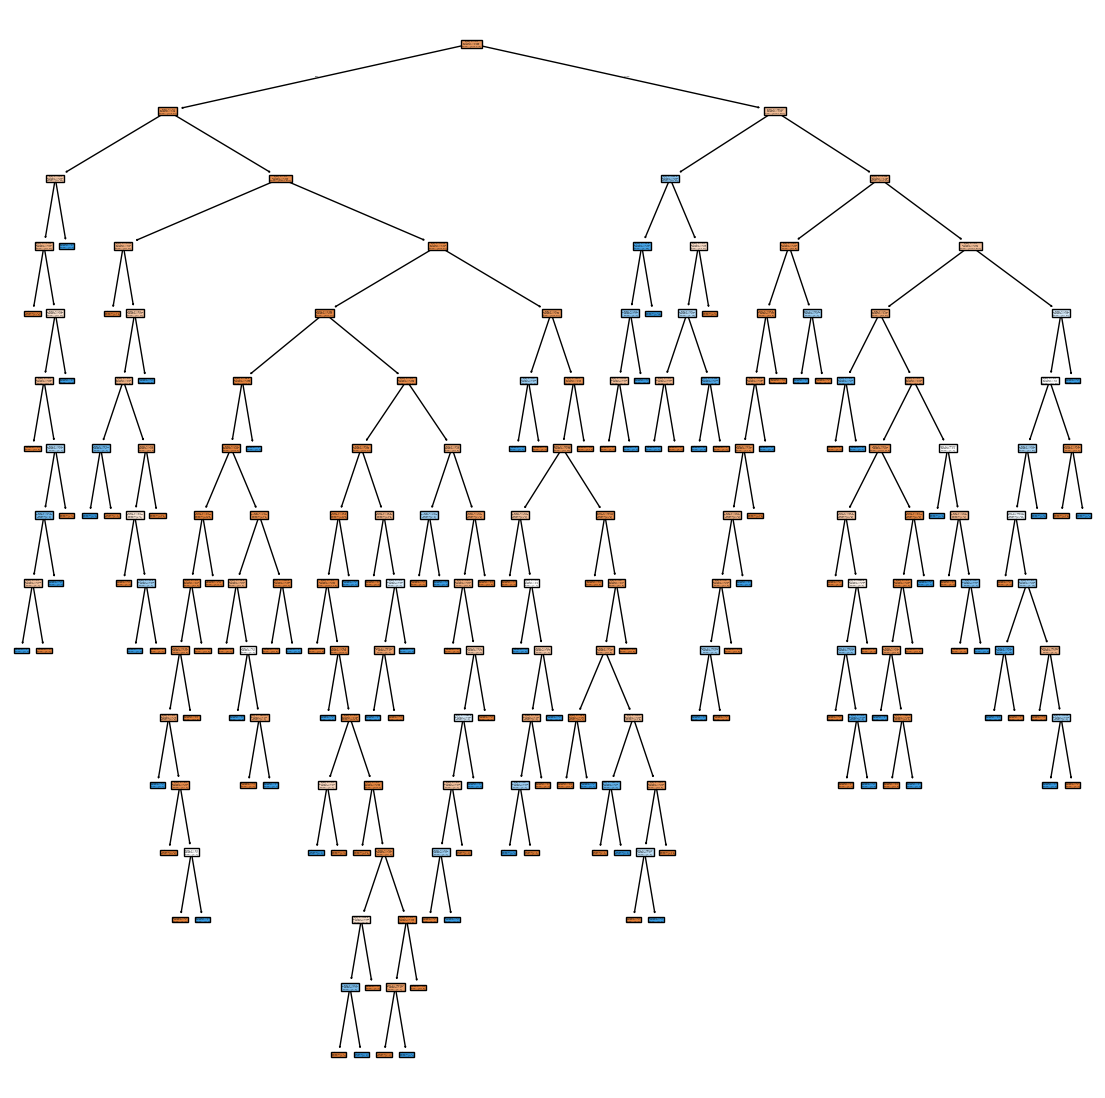

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

#Kfold Cross Validation

In [24]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 86.92275845512842 Validation: 84.29565929565929
K-Fold for depth: 3 Accuracy Std: Train: 0.5775857710423273 Validation: 5.236193523379632
***************
K-Fold for depth:4 Accuracy Mean: Train: 88.87888170957977 Validation: 83.66257166257168
K-Fold for depth: 4 Accuracy Std: Train: 0.5916695226630531 Validation: 4.405701919705348
***************
K-Fold for depth:5 Accuracy Mean: Train: 90.76428786497836 Validation: 84.47911547911548
K-Fold for depth: 5 Accuracy Std: Train: 0.42779638538489534 Validation: 4.598965556491614
***************
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 78.21375921375922
K-Fold for depth: 67 Accuracy Std: Train: 0.0 Validation: 5.940387961937502
***************
K-Fold for depth:9 Accuracy Mean: Train: 96.82393558152404 Validation: 80.57330057330057
K-Fold for depth: 9 Accuracy Std: Train: 0.4670485305771379 Validation: 4.95275331651863
***************
K-Fold for depth:11 Accuracy Mean: Train: 98.47748

##Training with best parameters

In [25]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf=tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

#Visualize a DT

In [26]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

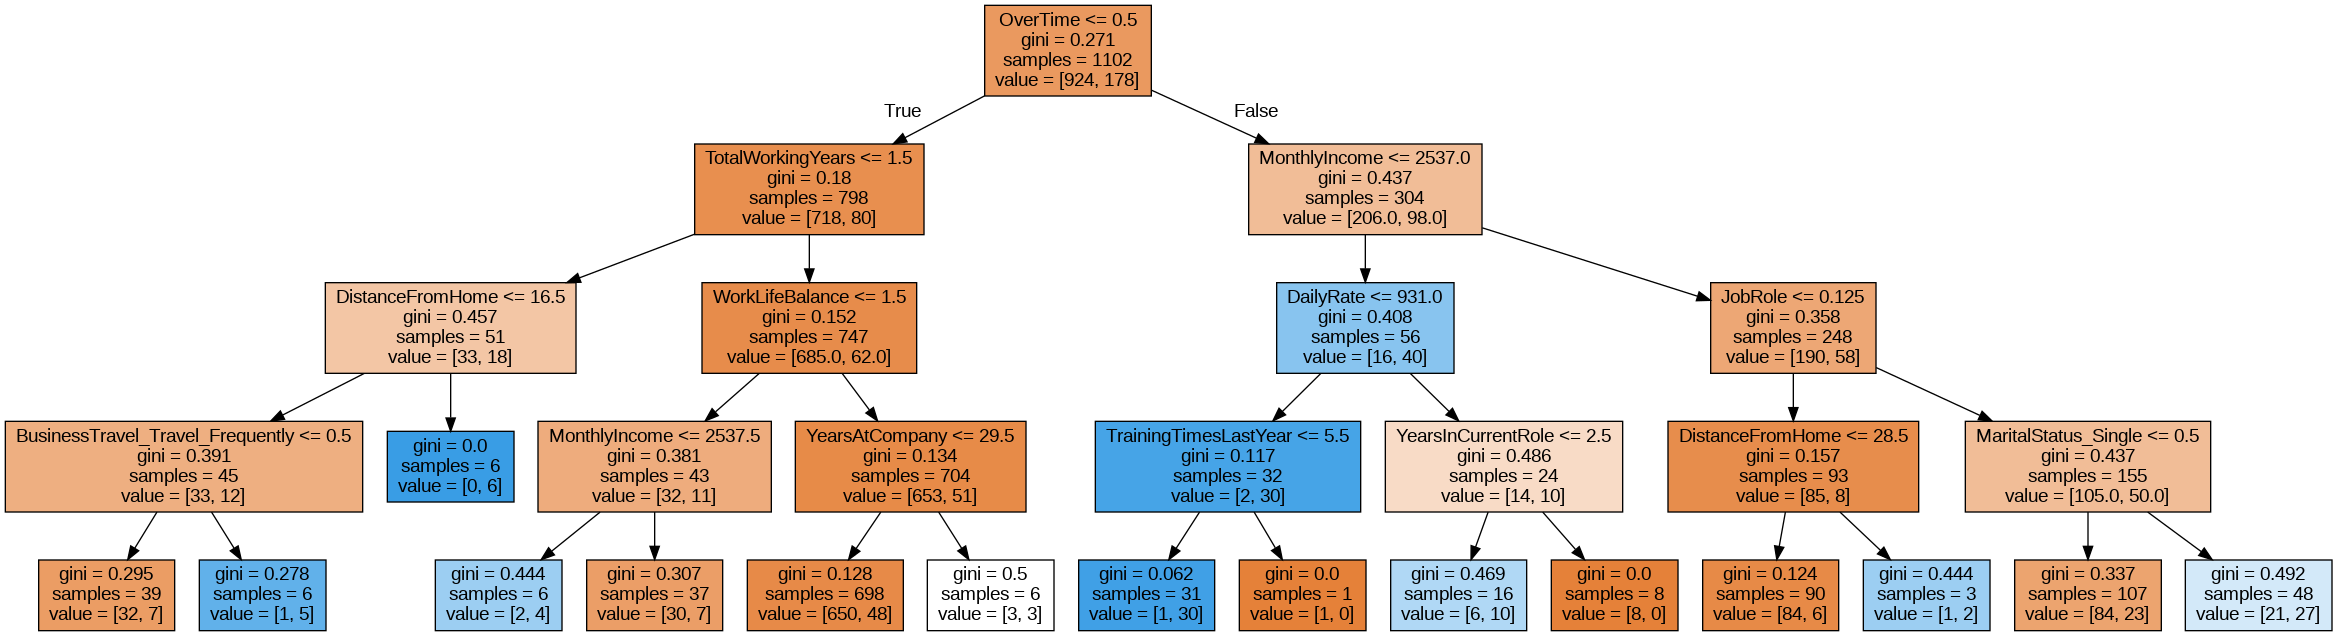

In [27]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

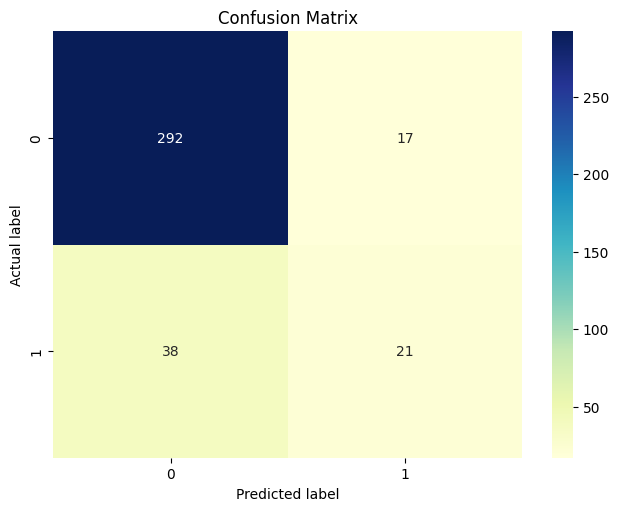

In [28]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

What did you notice?

- Model is classifying class 0 quite well.
- However, the number of FN is large.

#Feature Importance

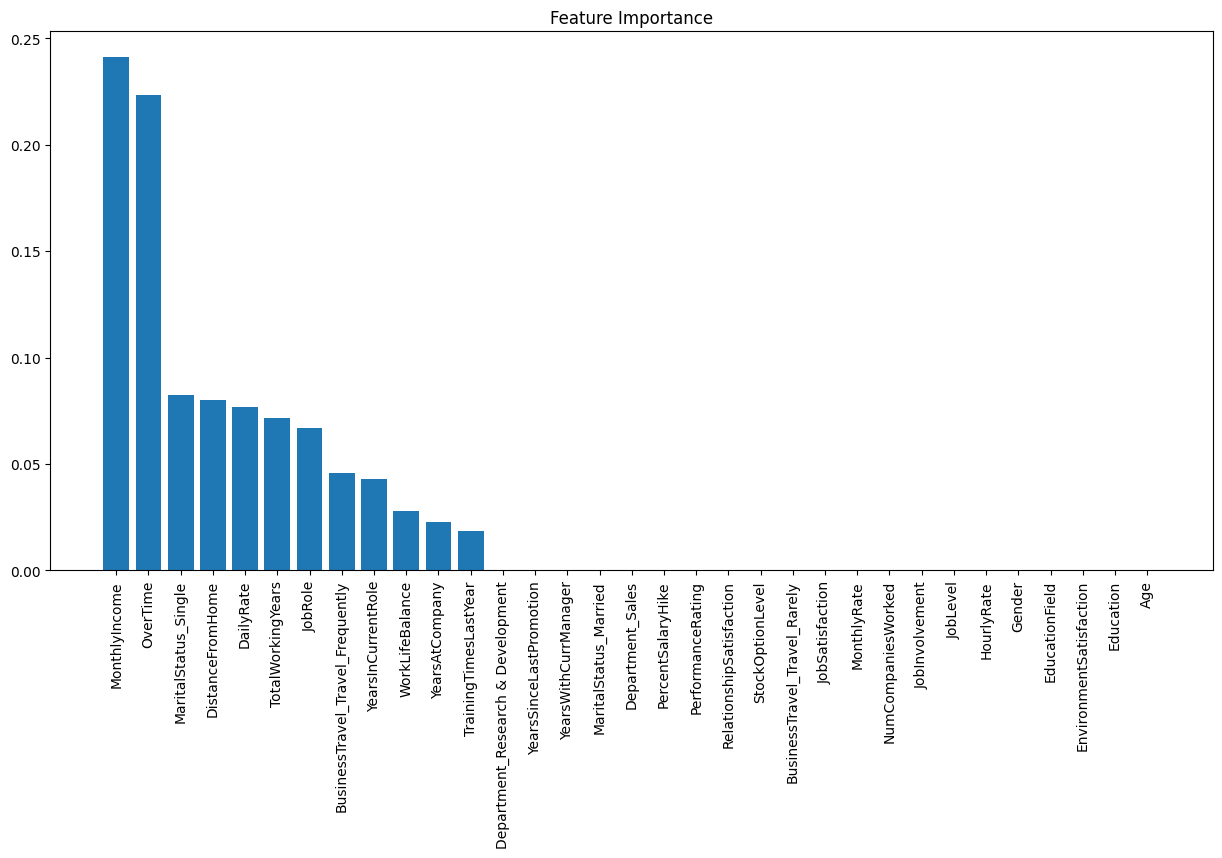

In [30]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot